# PNGアニメーション

いよいよ前期の授業は最終回になります。
後期の授業の予習としてアニメーション作成を紹介します。

<div class="alert alert-info">

後期の授業

Pythonを用いて、オブジェクト指向プログラミングを学びながら、
アルゴリズムとデータ構造の理解を深めて予定です。
楽しく学習ができるようにアニメーションを作りながら学びます。
</div>

## モジュールの準備

Python で画像やアニメーションを扱うためには、ライブラリ(Python ではモジュールと呼ぶ)を使います。

* **Pillow(PIL) モジュール**: Python で画像を簡単に扱うため
* **APNG モジュール**: アニメーション PNG を作成するため
* **IPython モジュール**: 画像/動画を Google Colaboratory 上に表示するため 

Google Colaboratory は、あらかじめよく使うモジュールがインストールされています。これらは、何も設定しなくても、`import`して使うことができます。



In [1]:
from PIL import Image , ImageDraw 
import IPython



ただし、APNGモジュールは、インストールされていません。
このような場合は、`pip`を使って、インストールしてから、`import`します。



In [2]:
!pip install APNG
from apng import APNG



<div class="alert alert-info">

pip/pip3

コンピュータ環境にPython モジュールをインストールするためのUNIXコマンドです。
</div>

## PNG 画像

まず、PNG画像を作ってみます。

### キャンバス

画像を描画するキャンバス (canvas) を作ってお絵かきを始めます。

__大きさを指定して、キャンバスを作成する__



In [3]:
canvas = Image.new("RGB", (400,300))



キャンバスの大きさは、動画にすることを考えて、あまり大きくせず、400 x 300 くらいにしておきます。

### 図形を描画する

実際の描画操作は、描画コンテキスト (draw) を作って行います。(この辺りの仕組みは、Python以外のプログラミング言語でもほぼ同じです。) 

__キャンバスの描画コンテキストを作る__



In [4]:
draw = ImageDraw.Draw(canvas)



まずは、長方形 (rectangle) をキャンバス上に描画してみましょう。
fill は、塗りつぶす色を指定してます。



In [5]:
draw.rectangle((100,100,200,200), fill='green')



### 描画した図形を保存する

キャンバスに描画した図形をPNGファイルに保存します。ファイル名は、なんでも構いませんが、拡張子は、`.png`にします。



In [6]:
canvas.save("rect.png")



(Colab 上に)保存されたPNGファイルは、`IPython.display`で表示してみることができます。



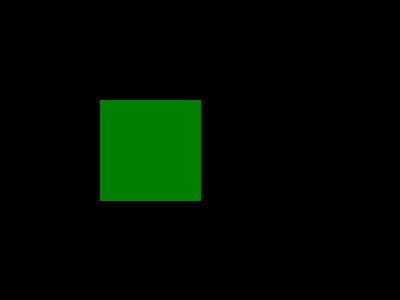

In [7]:
IPython.display.Image("rect.png")



<div class="alert alert-info">

Let's try

長方形の色や位置、大きさを変えて表示してみよう

</div>

### 円

円も描画する
ecllipse は、指定した短形におさまる楕円(円)を描画します。



In [8]:
draw.ellipse((250,200, 300, 250),fill=(192, 64, 64))



今回は、色を RGB で指定しています。

https://note.nkmk.me/python-pillow-imagedraw/

## アニメーションを作る

アニメーション（動画）は、複数の画像を作成し、パラパラ漫画と同じ原理で作ります。

まず、ボールが転がるアニメーションを作ってみましょう。
x 軸方向に +20 ずつ移動させながら、3枚ほど画像を作ります。

__ball0.png を作る__



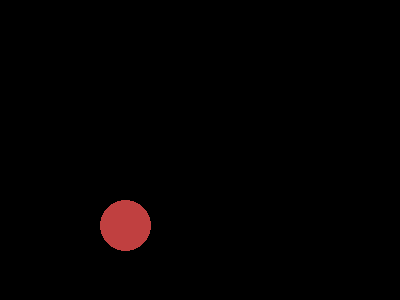

In [9]:
canvas = Image.new("RGB", (400,300), color='black') 
draw = ImageDraw.Draw(canvas)
draw.ellipse((100, 200, 150, 250),fill=(192, 64, 64)) 
canvas.save('ball0.png')
IPython.display.Image("ball0.png")



__ball1.png を作る__



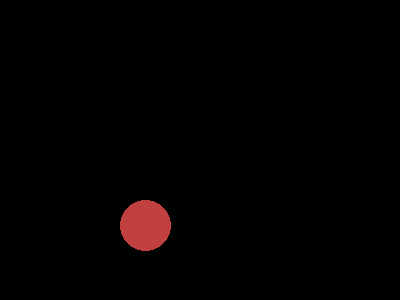

In [10]:
canvas = Image.new("RGB", (400,300), color='black') 
draw = ImageDraw.Draw(canvas)
draw.ellipse((100+20, 200, 150+20, 250),fill=(192, 64, 64)) 
canvas.save('ball1.png')
IPython.display.Image("ball1.png")




__ball2.png を作る__



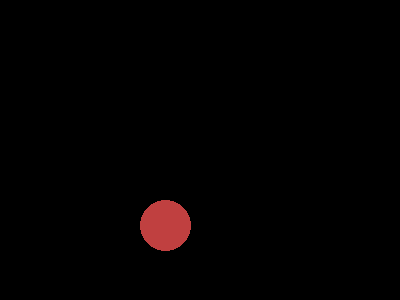

In [11]:
canvas = Image.new("RGB", (400,300), color='black')
draw = ImageDraw.Draw(canvas)
draw.ellipse((100+40, 200, 150+40, 250),fill=(192, 64, 64)) 
canvas.save('ball2.png')
IPython.display.Image("ball2.png")



<div class="alert alert-warning">

Let's try: 本来、１枚１枚作成してはいけません。

for文を使って、まとめて生成しましょう。
</div>

## APNG に変換する

Pillow/PILで保存したファイル名からファイルリストを作ります。



In [12]:
filelist = ['ball0.png', 'ball1.png', 'ball2.png']



APNG モジュールは、画像ファイルのリストからアニメーション PNG を作成します。delay は、画像 1 枚辺りの速度 (ミリ秒) です。



In [13]:
APNG.from_files(filelist, delay=100).save("ball-anime.png") 



> 注意: PNGアニメーションのファイル拡張子は、画像と同じ`.png`です。


<div class="alert alert-info">
Let's try

実際にアニメーション (APNG) を作成して表示してみよう。
(大したアニメーションでないのでここは期待しないでください。) 

```
IPython.display.Image("ball-anime.png")
```

</div>


### ボールを投げるアニメ

(例題) ボールがいい感じで放物運動するアニメーションを作ってみましょう。
時刻 t のときの (x,y) を次のようにします。(ここのパラメータは自由に調整して構いません。)

$x = 10t + 100$
$y = 2(t−10) +100$

あとは、時刻を `for t in range(20)`: のようにループでまわして、画像を作ります。画像名は、 filelist に追加しておきます。
   



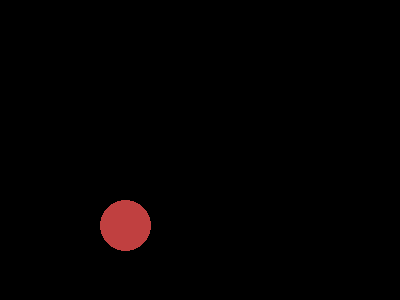

In [14]:
# 放物線を関数で定義しておく
def fy(t):
    return (t - 10)**2 + 100

filelist = []
for t in range (20):
    canvas = Image.new("RGB", (400,300), color="black") 
    draw = ImageDraw.Draw(canvas)
    x = 100 + 10 * t
    y = fy(t)
    draw.ellipse((x, y, x+50, y+50),fill=(192, 64, 64))
    canvas.save(f"ball{t}.png") 
    filelist.append(f"ball{t}.png")

APNG.from_files(filelist, delay=100).save("ball-anime.png")
IPython.display.Image("ball-anime.png")
